<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Digits" data-toc-modified-id="Digits-1">Digits</a></span></li><li><span><a href="#Wine" data-toc-modified-id="Wine-2">Wine</a></span></li><li><span><a href="#Breast-Cancer" data-toc-modified-id="Breast-Cancer-3">Breast Cancer</a></span></li></ul></div>

In [1]:
import warnings

from sklearn.datasets import load_digits, load_wine, load_breast_cancer, load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import *
from sklearn.linear_model import *
from sklearn.tree import *
from sklearn.svm import *
import sklearn.exceptions

import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)

In [2]:
class sklearn_dataset:
    def __init__(self, dataset, seed=None):
        self.dataset = dataset()
        self.seed = seed
        self.describe = None
        self.x, self.y = None, None
        self.x_train, self.x_test = None, None
        self.y_train, self.y_test = None, None
        self.model = None
        self.pred = None
        self.results = {}
        self.report = None
        self.df = None
    
    def make_x_y(self):
        self.describe = self.dataset.DESCR
        self.x = self.dataset.data
        self.y = self.dataset.target
        
    def eda(self):
        if 'target' in self.dataset.feature_names:
            raise ValueError('feature_names에 target 이라는 컬럼이름이 존재합니다.')
        self.dataset.feature_names = [name.replace('/', '_') for name in self.dataset.feature_names]
        self.df = pd.DataFrame(self.x, columns=self.dataset.feature_names)
        self.df['target'] = self.y
        self.df['target'] = self.df['target'].astype(str)
        print('target 분포')
        sns.countplot(x='target', data=self.df, hue='target')
        plt.show()
        print('Missing value count \n')
        if self.df.isna().sum().sum() == 0:
            print(': 결측치가 없습니다.')
        else:
            print(self.df.isna().sum()[self.df.isna().sum() != 0])
    
    def correlation(self, annot=False):
        plt.figure(figsize=(14,12))
        g = sns.heatmap(self.df.select_dtypes(include=[float, int]).corr(), annot=annot, cmap = "coolwarm", annot_kws={"fontsize":8}, center=0)
        plt.show()
    
    def catplot(self):           
        for feature in self.df.columns:
            if feature == 'target':
                continue
            sns.catplot(x='target', y=feature, data=self.df)
            plt.show()
    
    def boxplot(self, save=False):
        print('Box plot')
        for feature in self.df.columns:
            if feature == 'target':
                continue
            sns.catplot(x='target', y=feature, kind="box", data=self.df)
            if save:
                plt.savefig(f'{feature}_box_plot.png')
            plt.show()
        print()
            
    def scatter_plot(self):
        print('scatter plot')
        if len(self.df.columns) > 20:
            print('컬럼의 개수가 너무 많습니다. seaborn 라이브러리를 직접 사용하셔야 합니다.')
            return
        g = sns.PairGrid(self.df, hue='target')
        g.map_diag(sns.kdeplot)
        g.map(sns.scatterplot)
        plt.show()
        print()
        
    def split(self, test_size=0.2):
        if len(self.df.columns) != self.x.shape[1] + 1:
            array = self.df.to_numpy()
            self.x = array[:, :-1]
            self.y = array[:, -1]
            del array
            
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(self.x, self.y, test_size=test_size, random_state=self.seed)

    def select_model(self, model, **args):
        if model == LogisticRegression:
            self.model = model(solver='liblinear')
        else:
            self.model = model(**args)
        self.model.random_state = self.seed
        
    def train(self):
        if len(self.df.columns) != self.x.shape[1] + 1:
            array = self.df.to_numpy()
            self.x = array[:, :-1]
            self.y = array[:, -1]
            del array
        self.model.fit(self.x_train, self.y_train)
    
    def fit(self):
        self.train()
        
    
    def predict(self):
        self.pred = self.model.predict(self.x_test)
        return self.pred
    
    def test(self):
        self.predict()
        return self.pred
    
    def make_report(self):
        print(type(self.model).__name__, 'Report', '\n')
        self.report = classification_report(self.y_test, self.pred)
        self.results[type(self.model).__name__] = classification_report(self.y_test, self.pred, output_dict=True)
        print(self.report)
        print('='*53, '\n')

    def best_model(self, metric):
        result = {
            'acc': [],
            'recall': [],
            'precision': [],
            'f1': []
        }

        for model, v in self.results.items():
            result['acc'].append((v['accuracy'], model))
            result['recall'].append((v['macro avg']['recall'], model))
            result['precision'].append((v['macro avg']['precision'], model))
            result['f1'].append((v['macro avg']['f1-score'], model))
        
        for _, v in result.items():
            v.sort()

        print(f'{metric} 기준, 최고의 모델과 metric 값은 다음과 같습니다. \n')
        print('Best model: ', result[metric][-1][-1])
        print('Score: ', result[metric][-1][0])

## Digits

target 분포


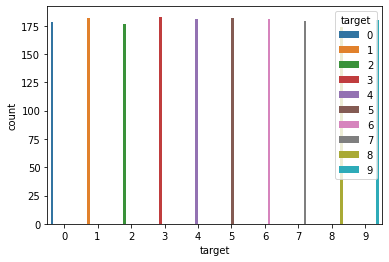

Missing value count 

: 결측치가 없습니다.


In [3]:
digits = sklearn_dataset(load_digits, seed=42)
digits.make_x_y()
digits.eda()

In [4]:
digits.df

In [5]:
digits.correlation()


<img src=https://i.ibb.co/yVfBjrn/3.png></img>

digits 컬럼 pixel_0_0, pixel_4_0, pixel_4_7 은 모든 값이 0이라 상관계수가 NaN으로 나오는 것을 확인할 수 있다.  
모든 값이 같기 때문에 삭제해준다.

In [6]:
del digits.df['pixel_0_0']
del digits.df['pixel_4_0']
del digits.df['pixel_4_7']

In [7]:
digits.boxplot(save=False)

<img src=https://i.ibb.co/4PTNHPm/merge.png></img>

각 픽셀을 피쳐로 보고, eda를 진행하다 보니 특징을 발견하기 힘들다.  
상관계수를 통해 전처리한 변수들만 모델에 이용해보자.

In [8]:
digits.split()
for model in [DecisionTreeClassifier, RandomForestClassifier, SVC, SGDClassifier, LogisticRegression]:
    digits.select_model(model)
    digits.train()
    digits.test()
    digits.make_report()

DecisionTreeClassifier Report 

              precision    recall  f1-score   support

           0       0.97      0.88      0.92        33
           1       0.96      0.79      0.86        28
           2       0.87      0.79      0.83        33
           3       0.75      0.88      0.81        34
           4       0.77      0.93      0.84        46
           5       0.95      0.89      0.92        47
           6       0.89      0.91      0.90        35
           7       0.88      0.85      0.87        34
           8       0.85      0.73      0.79        30
           9       0.83      0.88      0.85        40

    accuracy                           0.86       360
   macro avg       0.87      0.85      0.86       360
weighted avg       0.87      0.86      0.86       360


RandomForestClassifier Report 

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.93      1.00      0.97        28
           2 

In [9]:
digits.best_model('acc')

acc 기준, 최고의 모델과 metric 값은 다음과 같습니다. 

Best model:  SVC
Score:  0.9861111111111112


숫자 분류 모델의 경우, 정확도가 가장 중요합니다. 스팸메일이나 암분류와는 달리 맞고 틀리고가 명확하기 때문입니다.  
SVC 모델이 가장 높은 f-1 score 0.986를 달성함.

## Wine

target 분포


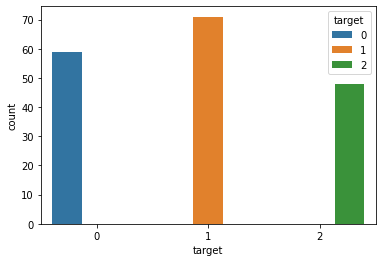

Missing value count 

: 결측치가 없습니다.


In [10]:
wine = sklearn_dataset(load_wine, seed=42)
wine.make_x_y()
wine.eda()

In [11]:
print(wine.describe)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [12]:
wine.df.head()

In [13]:
wine.correlation(annot=True)

<img src=https://i.ibb.co/hFwHSrH/image.png></img>

In [14]:
wine.scatter_plot()

<img src=https://i.ibb.co/JKmsGFR/1.png></img>

In [15]:
wine.boxplot(save=False)

<img src=https://i.ibb.co/yy1m4M0/merge-from-ofoct-1.jpg></img>

상관계수가 높은 경우도 존재하지 않고,  
데이터의 분포가 왜도가 높은 경우도 없기 때문에 전처리 없이 그대로 모델에 활용할 것입니다.

In [16]:
wine.split()
for model in [DecisionTreeClassifier, RandomForestClassifier, SVC, SGDClassifier, LogisticRegression]:
    wine.select_model(model)
    wine.train()
    wine.test()
    wine.make_report()

DecisionTreeClassifier Report 

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.93      1.00      0.97        14
           2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36


RandomForestClassifier Report 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36


SVC Report 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.73      0.79      0.76       

In [17]:
wine.best_model('acc')

acc 기준, 최고의 모델과 metric 값은 다음과 같습니다. 

Best model:  RandomForestClassifier
Score:  1.0


와인 분류 모델의 경우, 정확도가 가장 중요합니다.  
위의 숫자분류와 같이 맞고 틀리고가 명확하기 때문입니다.  
RandomForestClassifier 모델이 가장 높은 acc score 100%를 달성했습니다. 
  
다만, 누군가에게 와인을 추천해주는 상황의 경우  
자신이 추천해준 와인이 실제와 같은 것이 중요하기에 precison이 중요하다고도 볼 수 있습니다.  
precision 기준으로도 모델을 보면, 아래와 같습니다.

In [18]:
wine.best_model('precision')

precision 기준, 최고의 모델과 metric 값은 다음과 같습니다. 

Best model:  RandomForestClassifier
Score:  1.0


## Breast Cancer

target 분포


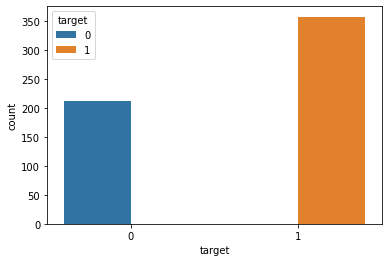

Missing value count 

: 결측치가 없습니다.


In [19]:
breast_cancer = sklearn_dataset(load_breast_cancer, seed=42)
breast_cancer.make_x_y()
breast_cancer.eda()

In [20]:
breast_cancer.df.head()

In [21]:
breast_cancer.correlation(annot=True)

<img src=https://i.ibb.co/tmXFjC5/4.png></img>

상관관계가 너무 높은 컬럼들이 존재.  
radius(반지름), perimeter(둘레), area(면적)은 r, 2 x pi x r, pi x r^2 의 관계이다.  
반지름과 둘레는 완벽한 상관관계이므로 삭제하자.

In [22]:
del breast_cancer.df['mean perimeter']
del breast_cancer.df['worst perimeter']

In [23]:
breast_cancer.scatter_plot()

scatter plot
컬럼의 개수가 너무 많습니다. seaborn 라이브러리를 직접 사용하셔야 합니다.


In [24]:
df = pd.concat([breast_cancer.df.iloc[:, :10], breast_cancer.df.iloc[:, -1]], axis=1)
g = sns.PairGrid(df, hue='target')
g.map_diag(sns.kdeplot)
g.map(sns.scatterplot)
plt.show()

<img src=https://i.ibb.co/8McSf0S/2.png></img>

In [25]:
breast_cancer.boxplot(save=True)

<img src=https://i.ibb.co/bBM3DQ8/merge-from-ofoct-2.jpg></img>

데이터의 왜도가 높다. Robust scaling을 적용하자.

In [26]:
import pandas as pd
from sklearn import preprocessing

x = breast_cancer.df.iloc[:, :-1].values
ss = preprocessing.RobustScaler()
x_scaled = ss.fit_transform(x)
breast_cancer.df.iloc[:, :-1] = x_scaled

In [27]:
breast_cancer.split()
for model in [DecisionTreeClassifier, RandomForestClassifier, SVC, SGDClassifier, LogisticRegression]:
    breast_cancer.select_model(model)
    breast_cancer.train()
    breast_cancer.test()
    breast_cancer.make_report()

DecisionTreeClassifier Report 

              precision    recall  f1-score   support

           0       0.93      0.91      0.92        43
           1       0.94      0.96      0.95        71

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114


RandomForestClassifier Report 

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


SVC Report 

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95      

In [28]:
breast_cancer.best_model('recall')

recall 기준, 최고의 모델과 metric 값은 다음과 같습니다. 

Best model:  LogisticRegression
Score:  0.9883720930232558


암 예측의 경우, 재현율이 중요하다. 실제 암 중에서 암으로 예측한 비율을 높여야 한다.  
재현율 기준, Logistic Regression이 0.988 의 score로 가장 높음을 확인할 수 있다.